In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import ctypes
ctypes.cdll.LoadLibrary('/usr/users/nbraun/basf2/lib/Linux_x86_64/opt/libarich_dataobjects.so')

from ipython_tools import handler
handler.style()

# $\Upsilon(4S) \to B \overline B$ event generation

This tutorial demonstrates how to generate
$$ e^+e^- \to \Upsilon(4S) \to B\overline B$$
events with EvtGen in BASF2, where the decay of $\Upsilon(4S)$ is specified by the given .dec file.
The generated events are saved to the output ROOT file.
In each event the generated particles (MCParticle objects) are stored in the StoreArray<MCParticle>.

Contributors: 
* A. Zupanc (June 2014)
* N. Braun (February 2016, conversion to IPython)

## Load the needed python modules

In [2]:
from basf2 import *
from modularAnalysis import *
from simulation import add_simulation
from reconstruction import add_reconstruction
from reconstruction import add_mdst_output
from beamparameters import add_beamparameters
from ROOT import Belle2

For a start, we can, for example, look up the definition of the `add_beamparameters` function.

In [3]:
help(add_beamparameters)

Help on function add_beamparameters in module beamparameters:

add_beamparameters(path, name, **argk)
    Add BeamParameter module to a given path
    
    Args:
        path (basf2.Path instance): path to add the module to
        name: name of the beamparameter settings to use
    
    Additional keyword arguments will be passed directly to the module as parameters.



We can then look into the BeamParameters module (if we want):

In [4]:
handler.modules.search("BeamParameter")

Now, we know how to use it. So we can create our path. 

* Create an empty path
* Load 100 events, which were generated before according to the specified DECAY table
  $$\Upsilon(4S) \to B_\text{tag}^- B_\text{sig}^+ \qquad B_\text{tag}^- \to D_0 \pi^-; D_0 \to K^- \pi^+ \qquad B_\text{sig}^+ \to \mu^+ \nu_\mu$$
* Reconstruct some decays and write the variables to NTuples

In [5]:
main_path = create_path()
inputMdst("./mdst.root", main_path)
fillParticleList('pi+', cut='piid > 0.5', path=main_path)
fillParticleList('K-', cut='Kid > 0.5', path=main_path)
reconstructDecay('D0 -> K- pi+', cut= '1.7 < M < 2.0', path=main_path)
reconstructDecay('B-:tag -> D0 pi-', cut= '5.2 < Mbc < 5.3 and abs(deltaE) < 0.5', path=main_path)
matchMCTruth('B-:tag', path=main_path)
variablesToNTuple('B-:tag', variables=['isSignal', 'Mbc', 'deltaE'], path=main_path)

Create a calculation object out of the path which you can use to start/stop/etc. the running calculation.

In [6]:
calculation = handler.process(main_path)

Then, start the calculation and wait for the end.

In [7]:
calculation.start()
calculation.wait_for_end()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

After the calculation has finished, we can look into the statistics...

In [8]:
calculation.show_statistics()

...and the generated log:

In [9]:
calculation.show_log()

isSignal       Mbc    deltaE
0         1  5.282691 -0.008635
1         0  5.272468  0.083899
2         1  5.274644  0.000329
3         1  5.274365  0.222093
4         1  5.274818  0.023108
5         1  5.280242  0.018774
6         1  5.273071  0.018410
7         1  5.277942 -0.017846
8         1  5.276691  0.010078
9         1  5.282605 -0.033755

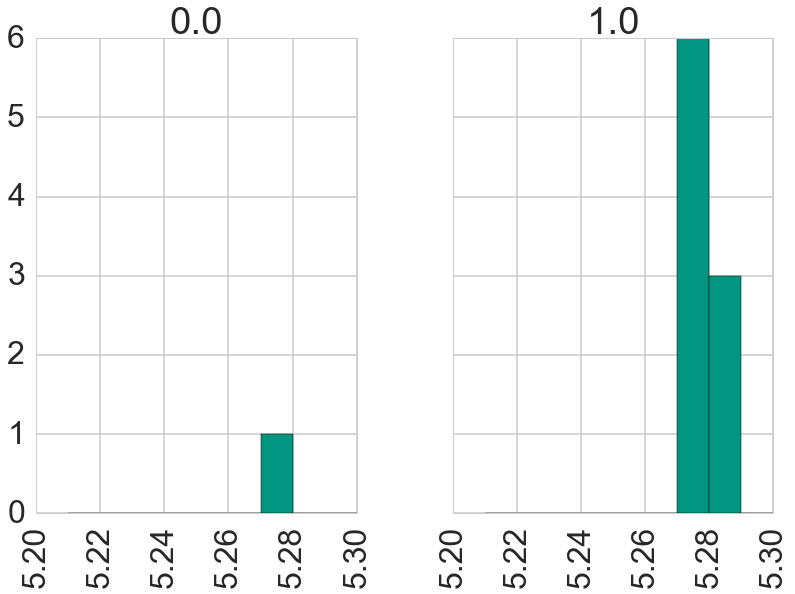

In [10]:
from root_pandas import read_root
df = read_root("./ntuple.root")
df.hist("Mbc", range=(5.2, 5.3), by="isSignal", sharey=True, sharex=True);
df